In [ ]:
#in the name of GOD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Gas_Sensors_Measurements = pd.read_csv('/content/drive/MyDrive/datasets/DM_P5/Gas Sensors Measurements/Gas_Sensors_Measurements.csv')
data = Gas_Sensors_Measurements

In [ ]:
data

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
0,0,555,515,377,338,666,451,416,NoGas,0_NoGas
1,1,555,516,377,339,666,451,416,NoGas,1_NoGas
2,2,556,517,376,337,666,451,416,NoGas,2_NoGas
3,3,556,516,376,336,665,451,416,NoGas,3_NoGas
4,4,556,516,376,337,665,451,416,NoGas,4_NoGas
...,...,...,...,...,...,...,...,...,...,...
6395,1595,658,445,455,414,491,321,436,Mixture,1595_Mixture
6396,1596,650,444,451,411,486,317,431,Mixture,1596_Mixture
6397,1597,630,443,446,407,474,312,429,Mixture,1597_Mixture
6398,1598,632,443,444,405,471,309,430,Mixture,1598_Mixture


In [ ]:
data.iloc[[1600]]

,Serial Number,MQ2,MQ3,MQ5,MQ6,MQ7,MQ8,MQ135,Gas,Corresponding Image Name
1600,0,592,517,370,341,632,419,389,Perfume,0_Perfume


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial Number             6400 non-null   int64 
 1   MQ2                       6400 non-null   int64 
 2   MQ3                       6400 non-null   int64 
 3   MQ5                       6400 non-null   int64 
 4   MQ6                       6400 non-null   int64 
 5   MQ7                       6400 non-null   int64 
 6   MQ8                       6400 non-null   int64 
 7   MQ135                     6400 non-null   int64 
 8   Gas                       6400 non-null   object
 9   Corresponding Image Name  6400 non-null   object
dtypes: int64(8), object(2)
memory usage: 500.1+ KB


In [ ]:
data.Gas.unique()

array(['NoGas', 'Perfume', 'Smoke', 'Mixture'], dtype=object)

In [ ]:
data.Gas.value_counts()

NoGas      1600
Perfume    1600
Smoke      1600
Mixture    1600
Name: Gas, dtype: int64

In [ ]:
features = ['MQ2', 'MQ3', 'MQ5', 'MQ6', 'MQ7', 'MQ8', 'MQ135']

X = data[features]
y = data['Gas']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install scikit-learn

#Decision Tree

[Text(0.403126033204232, 0.975, 'MQ3 <= 0.234\ngini = 0.75\nsamples = 4800\nvalue = [1197, 1195, 1199, 1209]'),
 Text(0.15624409597581712, 0.925, 'MQ8 <= -0.193\ngini = 0.5\nsamples = 2406\nvalue = [1197, 0, 0, 1209]'),
 Text(0.15019837521254487, 0.875, 'gini = 0.0\nsamples = 1179\nvalue = [1179, 0, 0, 0]'),
 Text(0.16228981673908938, 0.875, 'MQ5 <= 0.321\ngini = 0.029\nsamples = 1227\nvalue = [18, 0, 0, 1209]'),
 Text(0.15624409597581712, 0.825, 'gini = 0.0\nsamples = 1209\nvalue = [0, 0, 0, 1209]'),
 Text(0.1683355375023616, 0.825, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0]'),
 Text(0.6500079704326469, 0.925, 'MQ7 <= 0.918\ngini = 0.5\nsamples = 2394\nvalue = [0, 1195, 1199, 0]'),
 Text(0.3846560315511052, 0.875, 'MQ6 <= 0.09\ngini = 0.481\nsamples = 1971\nvalue = [0, 1180, 791, 0]'),
 Text(0.18042697902890611, 0.825, 'MQ2 <= -0.738\ngini = 0.347\nsamples = 725\nvalue = [0, 162, 563, 0]'),
 Text(0.17438125826563386, 0.775, 'gini = 0.0\nsamples = 48\nvalue = [0, 48, 0, 0]'),
 Te

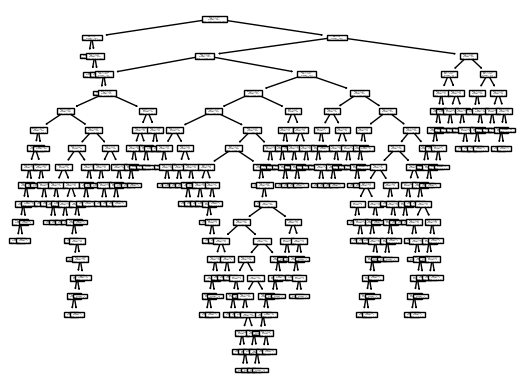

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

tree.plot_tree(dtree, feature_names=features)

In [ ]:
y_pred_dt = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[403   0   0   0]
 [  0 372  33   0]
 [  0  24 377   0]
 [  0   0   0 391]]
              precision    recall  f1-score   support

     Mixture       1.00      1.00      1.00       403
       NoGas       0.94      0.92      0.93       405
     Perfume       0.92      0.94      0.93       401
       Smoke       1.00      1.00      1.00       391

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)))

Model accuracy score: 0.9644


#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))

Model accuracy score: 0.8400


Compare the train-set and test-set accuracy

In [ ]:
y_pred_train_gnb = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gnb)))

Training-set accuracy score: 0.8560


Check for overfitting and underfitting

In [ ]:
print('Training set accuracy score: {:.4f}'.format(accuracy_score(y_train, y_pred_train_gnb)))

print('Test set accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred_gnb)))

Training set accuracy score: 0.8560
Test set accuracy score: 0.8400


These two values are quite comparable. So, there is no sign of overfitting.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

     Mixture       1.00      1.00      1.00       403
       NoGas       0.65      0.80      0.72       405
     Perfume       0.74      0.56      0.64       401
       Smoke       1.00      1.00      1.00       391

    accuracy                           0.84      1600
   macro avg       0.85      0.84      0.84      1600
weighted avg       0.85      0.84      0.84      1600



#SVM

In [ ]:
#SVM with Linear Kernel
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

Model accuracy score: 0.8512


In [ ]:
#SVM with Polynomial Kernel

p_svm_clf = SVC(kernel='poly')

p_svm_clf.fit(X_train, y_train)

y_pred_p_svm = p_svm_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_p_svm)))

Model accuracy score: 0.9237


In [ ]:
#SVM with Gaussian RBF Kernel
g_svm_clf = SVC(kernel='rbf')

g_svm_clf.fit(X_train, y_train)

y_pred_g_svm = g_svm_clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_g_svm)))

Model accuracy score: 0.9387


#Imagec classification

In [ ]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
import cv2
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
C = 14401

In [ ]:
img_data=np.zeros((6400 , C))

In [ ]:
#NoGas = 0
for i in range(0,1600):
  path = '/content/drive/MyDrive/datasets/DM_P5/Thermal Camera Images/NoGas/'+str(i)+'_NoGas.png'
  image = io.imread(path)
  image_resized = resize(image, (image.shape[0] // 8, image.shape[1] // 8),
                       anti_aliasing=True)

  array1 = array(image_resized)
  array2 = array1.flatten()
  array2 = np.append(array2, 0)

  img_data[i,:]= array2


In [ ]:
len(array2)

14401

In [ ]:
#Perfume = 1
for i in range(0,1600):
  path = '/content/drive/MyDrive/datasets/DM_P5/Thermal Camera Images/Perfume/'+str(i)+'_Perfume.png'
  image = io.imread(path)
  image_resized = resize(image, (image.shape[0] // 8, image.shape[1] // 8),
                       anti_aliasing=True)

  array1 = array(image_resized)
  array2 = array1.flatten()
  array2 = np.append(array2, 1)

  img_data[1600 + i,:]= array2


In [ ]:
#Smoke   = 2
for i in range(0,1600):
  path = '/content/drive/MyDrive/datasets/DM_P5/Thermal Camera Images/Smoke/'+str(i)+'_Smoke.png'
  image = io.imread(path)
  image_resized = resize(image, (image.shape[0] // 8, image.shape[1] // 8),
                       anti_aliasing=True)

  array1 = array(image_resized)
  array2 = array1.flatten()
  array2 = np.append(array2, 2)


  img_data[3200 + i,:]= array2

img_data

array([[9.87383382e-01, 9.90036605e-01, 9.78627021e-01, ...,
        4.82075251e-01, 3.50155620e-01, 0.00000000e+00],
       [9.87419222e-01, 9.90072986e-01, 9.78664715e-01, ...,
        4.82800737e-01, 3.51138249e-01, 0.00000000e+00],
       [9.87624145e-01, 9.90183323e-01, 9.78737210e-01, ...,
        9.31637549e-04, 8.89083976e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
#Mixture = 3

for i in range(0,1600):
  path = '/content/drive/MyDrive/datasets/DM_P5/Thermal Camera Images/Mixture/'+str(i)+'_Mixture.png'
  image = io.imread(path)
  image_resized = resize(image, (image.shape[0] // 8, image.shape[1] // 8),
                       anti_aliasing=True)

  array1 = array(image_resized)
  array2 = array1.flatten()
  array2 = np.append(array2, 3)
  img_data[4800 + i,:]= array2


In [ ]:
img_X = img_data[:, 0 : C-1]
img_y = img_data[:, C-1]

from sklearn.model_selection import train_test_split
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(img_X,img_y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [ ]:
# convert from integers to floats
X_train_img = X_train_img.astype('float32')
X_test_img = X_test_img.astype('float32')
# normalize to range 0-1
X_train_img = X_train_img / 255.0
X_test_img = X_test_img / 255.0

#Decision Tree

[Text(0.37969144238856184, 0.9857142857142858, 'x[4] <= 0.002\ngini = 0.75\nsamples = 4800\nvalue = [1195, 1199, 1209, 1197]'),
 Text(0.37296309924306137, 0.9571428571428572, 'gini = 0.0\nsamples = 1197\nvalue = [0, 0, 0, 1197]'),
 Text(0.38641978553406225, 0.9571428571428572, 'x[1428] <= 0.001\ngini = 0.667\nsamples = 3603\nvalue = [1195, 1199, 1209, 0]'),
 Text(0.12699747687132043, 0.9285714285714286, 'x[4587] <= 0.001\ngini = 0.329\nsamples = 1295\nvalue = [172, 79, 1044, 0]'),
 Text(0.045416316232127836, 0.9, 'x[14244] <= 0.003\ngini = 0.071\nsamples = 846\nvalue = [13, 18, 815, 0]'),
 Text(0.03868797308662742, 0.8714285714285714, 'x[1241] <= 0.0\ngini = 0.06\nsamples = 841\nvalue = [13, 13, 815, 0]'),
 Text(0.01345668629100084, 0.8428571428571429, 'x[1195] <= 0.002\ngini = 0.611\nsamples = 6\nvalue = [2, 3, 1, 0]'),
 Text(0.00672834314550042, 0.8142857142857143, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]'),
 Text(0.020185029436501262, 0.8142857142857143, 'x[11999] <= 0.0\ngini

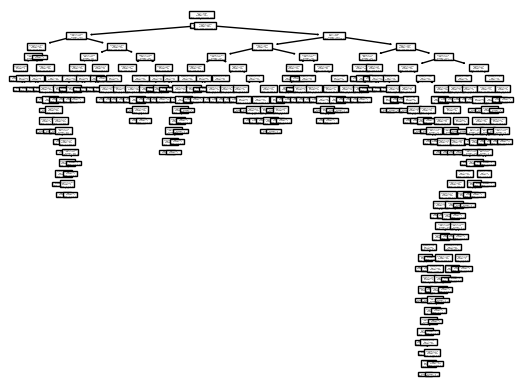

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

img_dtree = DecisionTreeClassifier()
img_dtree = img_dtree.fit(X_train_img, y_train_img)

tree.plot_tree(img_dtree)

In [ ]:
y_pred_img_dt = img_dtree.predict(X_test_img)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_img, y_pred_img_dt)))

Model accuracy score: 0.9038


#Multimodal Classification

In [ ]:
concat_data = np.concatenate((X, img_data), axis=1)

In [ ]:
concat_X = concat_data[:, 0 : C+6]
concat_y = concat_data[:, C+6]

from sklearn.model_selection import train_test_split
X_train_concat, X_test_concat, y_train_concat, y_test_concat = train_test_split(concat_X,concat_y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

[Text(0.3625104515050167, 0.9705882352941176, 'x[1] <= 486.0\ngini = 0.75\nsamples = 4800\nvalue = [1195, 1199, 1209, 1197]'),
 Text(0.20903010033444816, 0.9117647058823529, 'x[17] <= 0.045\ngini = 0.5\nsamples = 2406\nvalue = [0, 0, 1209, 1197]'),
 Text(0.1956521739130435, 0.8529411764705882, 'gini = 0.0\nsamples = 1197\nvalue = [0, 0, 0, 1197]'),
 Text(0.22240802675585283, 0.8529411764705882, 'gini = 0.0\nsamples = 1209\nvalue = [0, 0, 1209, 0]'),
 Text(0.5159908026755853, 0.9117647058823529, 'x[13] <= 0.547\ngini = 0.5\nsamples = 2394\nvalue = [1195, 1199, 0, 0]'),
 Text(0.2491638795986622, 0.8529411764705882, 'x[12445] <= 0.387\ngini = 0.366\nsamples = 1021\nvalue = [775, 246, 0, 0]'),
 Text(0.1705685618729097, 0.7941176470588235, 'x[6821] <= 0.779\ngini = 0.222\nsamples = 795\nvalue = [694, 101, 0, 0]'),
 Text(0.10702341137123746, 0.7352941176470589, 'x[464] <= 0.845\ngini = 0.147\nsamples = 739\nvalue = [680, 59, 0, 0]'),
 Text(0.06020066889632107, 0.6764705882352942, 'x[1591] <=

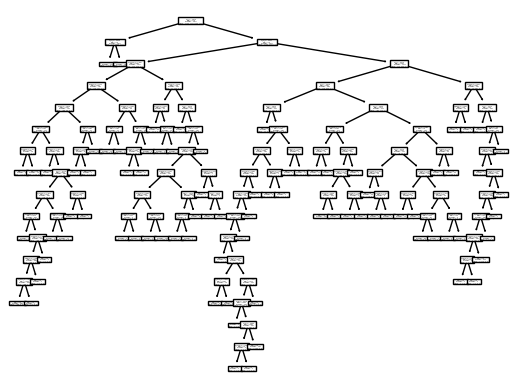

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

concat_dtree = DecisionTreeClassifier()
concat_dtree = concat_dtree.fit(X_train_concat, y_train_concat)

tree.plot_tree(concat_dtree)

In [ ]:
y_pred_concat_dt = concat_dtree.predict(X_test_concat)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_concat, y_pred_concat_dt)))

Model accuracy score: 0.9625
